In [16]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB
## At Bats

In [17]:
from data import __DB__
from pymongoarrow.api import find_pandas_all

at_bats_df: pd.DataFrame = find_pandas_all(__DB__.atBats, dict(), projection = {'_id': False})
at_bats_df.set_index(['game_pk', 'home', 'at_bat', 'batter', 'pitcher'], inplace = True)
at_bats_df.sort_index(inplace = True)
at_bats_df

xBA  events    rhb   rhp
game_pk home  at_bat batter pitcher                            
413649  False 1      594777 433587     NaN       5  False  True
              2      545361 433587   0.987       3   True  True
              3      405395 433587     NaN       5   True  True
              4      459964 433587     NaN       5  False  True
              9      501896 433587     NaN       5   True  True
...                                    ...     ...    ...   ...
718782  True  86     657077 642585   0.920       0  False  True
              87     646240 642585     NaN       5  False  True
              88     457759 642585   0.129       0   True  True
              89     807799 642585   0.151      15  False  True
              90     594807 642585     NaN       5   True  True

[1491906 rows x 4 columns]

## Games

In [18]:
games_df: pd.DataFrame = find_pandas_all(__DB__.games, dict(), projection = {'_id': False})
games_df.set_index('game_pk', inplace = True)
games_df

,game_date,away_team,home_team,home_starter,away_starter
game_pk,,,,,
413661,2015-04-05,STL,CHC,452657,425794
413650,2015-04-06,ATL,MIA,506693,527054
413649,2015-04-06,LAA,SEA,433587,450308
413651,2015-04-06,BAL,TB,502042,501957
413655,2015-04-06,COL,MIL,346798,452718
...,...,...,...,...,...
449293,2016-10-02,OAK,SEA,433587,640455
449294,2016-10-02,PIT,STL,425794,285064
449295,2016-10-02,SD,AZ,571863,518560


## Speed

In [19]:
speed_df: pd.DataFrame = find_pandas_all(__DB__.sprintSpeeds, dict(), projection = {'_id': False})
speed_df.set_index(['year', 'batter'], inplace = True)
speed_df

hp_to_1b  speed bats
year batter                      
2015 595281      4.05   29.7    L
     607208       NaN   30.7    R
     621439       NaN   30.9    R
     452239      4.33   29.6    R
     517369      4.18   29.4    R
...               ...    ...  ...
2016 435263      5.04   23.0    L
     516949       NaN   22.8    S
     405395      5.02   22.6    R
     400121      4.76   22.5    S
     477195       NaN   22.3    L

[5216 rows x 3 columns]

# How good is xBA?

In [20]:
from data import enhance_at_bats

enhanced_at_bats = enhance_at_bats(at_bats_df = at_bats_df, games_df = games_df, speed_df = speed_df)
enhanced_at_bats

99.8% of at bats were statcast tracked...


xBA  \
game_date  game_pk home  team opponent at_bat batter pitcher          
2015-04-05 413661  False STL  CHC      1      572761 452657     NaN   
                                       2      518792 452657     NaN   
                                       3      407812 452657     NaN   
                                       4      425509 452657     NaN   
                                       5      571431 452657     NaN   
...                                                             ...   
2023-08-20 716929  True  WSH  PHI      54     682928 554430     NaN   
                                       59     657041 656814   0.106   
                                       60     608841 656814   0.346   
                                       61     660688 656814   0.003   
                                       62     642086 656814   0.411   

                                                                                 events  \
game_date  game_pk home  team opponent at_bat batter pitcher                              
2015-04-05 413661  False STL  CHC      1      572761 452657                   field_out   
                                       2      518792 452657                      double   
                                       3      407812 452657                      single   
                                       4      425509 452657                   strikeout   
                                       5      571431 452657                   strikeout   
...                                                                                 ...   
2023-08-20 716929  True  WSH  PHI      54     682928 554430                   strikeout   
                                       59     657041 656814                      single   
                                       60     608841 656814                      single   
                                       61     660688 656814                   field_out   
                                       62     642086 656814   grounded_into_double_play   

                                                                rhb    rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2015-04-05 413661  False STL  CHC      1      572761 452657   False  False   
                                       2      518792 452657   False  False   
                                       3      407812 452657    True  False   
                                       4      425509 452657    True  False   
                                       5      571431 452657   False  False   
...                                                             ...    ...   
2023-08-20 716929  True  WSH  PHI      54     682928 554430   False   True   
                                       59     657041 656814    True   True   
                                       60     608841 656814    True   True   
                                       61     660688 656814   False   True   
                                       62     642086 656814   False   True   

                                                              opp_starting_pitcher  \
game_date  game_pk home  team opponent at_bat batter pitcher                         
2015-04-05 413661  False STL  CHC      1      572761 452657                 452657   
                                       2      518792 452657                 452657   
                                       3      407812 452657                 452657   
                                       4      425509 452657                 452657   
                                       5      571431 452657                 452657   
...                                                                            ...   
2023-08-20 716929  True  WSH  PHI      54     682928 554430                 554430   
                                       59     657041 656814                 554430   
                                       60     608841 656814                 55443

In [21]:
from model import LogisticRegression1

log_reg = LogisticRegression1(enhanced_at_bats)

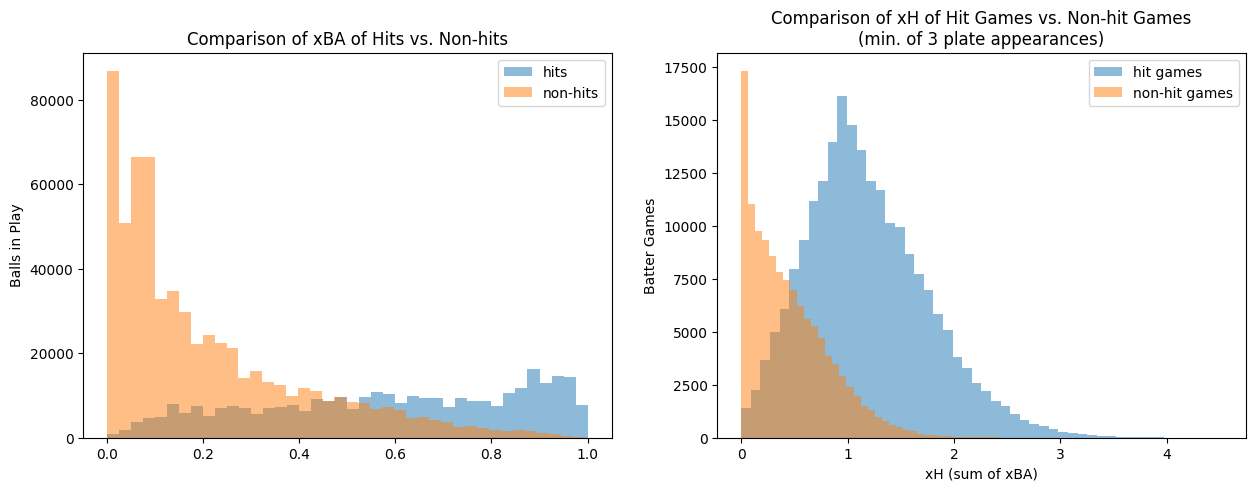

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (15, 5))

bip_df = log_reg.at_bats_df.loc[log_reg.at_bats_df.xBA > 0, ['xBA', 'H']]

hits_xBA = bip_df.loc[bip_df.H, 'xBA']
axs[0].hist(hits_xBA, alpha = 0.5, bins = 40, label = 'hits')

non_hits_xBA = bip_df.loc[~bip_df.H, 'xBA']
axs[0].hist(non_hits_xBA, alpha = 0.5, bins = 40, label = 'non-hits')
axs[0].set_title('Comparison of xBA of Hits vs. Non-hits')
axs[0].set_ylabel('Balls in Play')
axs[0].legend(loc = 'upper right')


batter_games_df = log_reg.at_bats_df.groupby(['game_date', 'game_pk', 'home', 'batter']).agg({'events': 'count', 'xBA': sum, 'H': sum}).rename({'events': 'PA'}, axis = 1)

axs[1].hist(batter_games_df.loc[(batter_games_df.PA >= 3) & (batter_games_df.H > 0), 'xBA'], alpha = 0.5, bins = 50, label = 'hit games')
axs[1].hist(batter_games_df.loc[(batter_games_df.PA >= 3) & (batter_games_df.H == 0), 'xBA'], alpha = 0.5, bins = 50, label = 'non-hit games')

axs[1].set_title('Comparison of xH of Hit Games vs. Non-hit Games\n(min. of 3 plate appearances)')
axs[1].set_xlabel('xH (sum of xBA)')
axs[1].set_ylabel('Batter Games')
axs[1].legend(loc = 'upper right')

plt.show()

In [23]:
log_reg.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  \
game_date  game_pk batter                                            
2015-04-05 413661  407812           0      0.000000       0.000000   
                   425509           0      0.000000       0.000000   
                   425794           0      0.000000       0.000000   
                   425877           0      0.000000       0.000000   
                   445055           0      0.000000       0.000000   
...                               ...           ...            ...   
2023-08-20 716929  666164           7      0.428571       0.142857   
                   666906          14      0.714286       0.214286   
                   669016          50      0.620000       0.340000   
                   681082          50      0.720000       0.500000   
                   682928          50      0.680000       0.420000   

                           PA/G_last_50G  BIP/G_last_50G  H/G_last_50G  \
game_date  game_pk batter                                                
2015-04-05 413661  407812       0.000000        0.000000      0.000000   
                   425509       0.000000        0.000000      0.000000   
                   425794       0.000000        0.000000      0.000000   
                   425877       0.000000        0.000000      0.000000   
                   445055       0.000000        0.000000      0.000000   
...                                  ...             ...           ...   
2023-08-20 716929  666164       3.714286        2.571429      0.857143   
                   666906       3.857143        2.428571      1.000000   
                   669016       3.860000        2.280000      0.960000   
                   681082       4.200000        3.380000      1.160000   
                   682928       4.320000        3.240000      1.140000   

                           xH/G_last_50G  
game_date  game_pk batter                 
2015-04-05 413661  407812       0.000000  
                   425509       0.000000  
                   425794       0.000000  
                   425877       0.000000  
                   445055       0.000000  
...                                  ...  
2023-08-20 716929  666164       0.665429  
                   666906       0.768143  
                   669016       0.797480  
                   681082       1.120260  
                   682928       1.066260  

[337501 rows x 7 columns]

In [24]:
log_reg.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  game_pk batter                                                      
2015-04-05 413661  407812              0           0.000000         0.000000   
                   424325              0           0.000000         0.000000   
                   425509              0           0.000000         0.000000   
                   425794              0           0.000000         0.000000   
                   425877              0           0.000000         0.000000   
...                                  ...                ...              ...   
2023-08-20 716929  666164             28           0.678571         0.214286   
                   666906             61           0.622951         0.229508   
                   669016            200           0.595000         0.255000   
                   681082            200           0.795000         0.260000   
                   682928            200           0.745000         0.245000   

                           xH/PA_last_200PA  
game_date  game_pk batter                    
2015-04-05 413661  407812          0.000000  
                   424325          0.000000  
                   425509          0.000000  
                   425794          0.000000  
                   425877          0.000000  
...                                     ...  
2023-08-20 716929  666164          0.169821  
                   666906          0.188852  
                   669016          0.211615  
                   681082          0.262430  
                   682928          0.233600  

[412122 rows x 4 columns]

It appears that xBA is in fact an important aspect of getting hits as the distributions of xBA on hits and non-hits are very different from each other, both on an at-bat level and a game level.

Now, I need to see how I can use xBA to predict whether hitters will get a hit or not based on their past performance...

# Prediction
## Get K%, BB%, H/BF, xH/BF for starting pitchers and bullpens

In [25]:
log_reg.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk pitcher                                                 
2015-04-05 413661  425794               0       0.000000        0.000000   
                   435400               0       0.000000        0.000000   
                   444468               0       0.000000        0.000000   
                   452657               0       0.000000        0.000000   
                   457435               0       0.000000        0.000000   
...                                   ...            ...             ...   
2023-08-20 716929  607179             200       0.280000        0.075000   
                   640448             200       0.265000        0.055000   
                   640451             200       0.285000        0.070000   
                   656814             142       0.161972        0.112676   
                   666168             200       0.195000        0.095000   

                            H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk pitcher                                     
2015-04-05 413661  425794          0.000000          0.000000  
                   435400          0.000000          0.000000  
                   444468          0.000000          0.000000  
                   452657          0.000000          0.000000  
                   457435          0.000000          0.000000  
...                                     ...               ...  
2023-08-20 716929  607179          0.160000          0.202950  
                   640448          0.200000          0.217695  
                   640451          0.170000          0.204030  
                   656814          0.253521          0.232007  
                   666168          0.235000          0.211050  

[169292 rows x 5 columns]

In [26]:
log_reg.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk opponent                                                 
2015-04-05 413661  CHC                   0          0.000           0.000   
                   STL                   0          0.000           0.000   
2015-04-06 413649  LAA                   0          0.000           0.000   
                   SEA                   0          0.000           0.000   
           413650  ATL                   0          0.000           0.000   
...                                    ...            ...             ...   
2023-08-20 716927  SF                  200          0.235           0.055   
           716928  BOS                 200          0.265           0.045   
                   NYY                 200          0.215           0.100   
           716929  PHI                 200          0.225           0.065   
                   WSH                 200          0.245           0.070   

                             H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk opponent                                     
2015-04-05 413661  CHC                 0.000          0.000000  
                   STL                 0.000          0.000000  
2015-04-06 413649  LAA                 0.000          0.000000  
                   SEA                 0.000          0.000000  
           413650  ATL                 0.000          0.000000  
...                                      ...               ...  
2023-08-20 716927  SF                  0.260          0.216455  
           716928  BOS                 0.220          0.217485  
                   NYY                 0.195          0.195155  
           716929  PHI                 0.215          0.214510  
                   WSH                 0.225          0.224625  

[39062 rows x 5 columns]

## Features

In [27]:
log_reg.aggregated_df(filtered = False)

PA      H  \
game_date  game_pk home  team opponent opp_starting_pitcher batter              
2015-04-05 413661  False STL  CHC      452657               407812   5   True   
                                                            425509   5   True   
                                                            425794   3  False   
                                                            425877   4  False   
                                                            445055   4   True   
...                                                                 ..    ...   
2023-08-20 716929  True  WSH  PHI      554430               657041   4   True   
                                                            660688   4   True   
                                                            666164   3  False   
                                                            666906   3  False   
                                                            682928   4   True   

                                                                    hp_to_1b  \
game_date  game_pk home  team opponent opp_starting_pitcher batter             
2015-04-05 413661  False STL  CHC      452657               407812      4.54   
                                                            425509      4.75   
                                                            425794       NaN   
                                                            425877      4.91   
                                                            445055      4.54   
...                                                                      ...   
2023-08-20 716929  True  WSH  PHI      554430               657041      4.39   
                                                            660688      4.83   
                                                            666164      4.44   
                                                            666906      4.36   
                                                            682928      4.22   

                                                                    G_last_50G  \
game_date  game_pk home  team opponent opp_starting_pitcher batter               
2015-04-05 413661  False STL  CHC      452657               407812           0   
                                                            425509           0   
                                                            425794           0   
                                                            425877           0   
                                                            445055           0   
...                                                                        ...   
2023-08-20 716929  True  WSH  PHI      554430               657041          50   
                                                            660688          50   
                                                            666164           7   
                                                            666906          14   
                                                            682928          50   

                                                                    HG%_last_50G  \
game_date  game_pk home  team opponent opp_starting_pitcher batter                 
2015-04-05 413661  False STL  CHC      452657               407812      0.000000   
                                                            425509      0.000000   
                                                            425794      0.000000   
                                                            425877      0.000000   
                                                            445055      0.000000   
...                                                                          ...   
2023-08-20 716929  True  WSH  PHI      554430               657041      0.700000   
                                                            660688      0.660000   
                                                            666164

In [28]:
log_reg.aggregated_df(filtered = True)

H  \
game_date  game_pk home  team opponent opp_starting_pitcher batter          
2015-05-03 414016  True  SD   COL      452718               461314  False   
           414020  False OAK  TEX      451596               543760   True   
           414026  False WSH  NYM      518716               435622   True   
                                                            475582   True   
                                                            547180   True   
...                                                                   ...   
2023-08-20 716929  True  WSH  PHI      554430               642086   True   
                                                            656448  False   
                                                            657041   True   
                                                            660688   True   
                                                            682928   True   

                                                                    hp_to_1b  \
game_date  game_pk home  team opponent opp_starting_pitcher batter             
2015-05-03 414016  True  SD   COL      452718               461314      4.68   
           414020  False OAK  TEX      451596               543760      4.23   
           414026  False WSH  NYM      518716               435622      4.38   
                                                            475582      4.56   
                                                            547180      4.34   
...                                                                      ...   
2023-08-20 716929  True  WSH  PHI      554430               642086      4.58   
                                                            656448      4.46   
                                                            657041      4.39   
                                                            660688      4.83   
                                                            682928      4.22   

                                                                    HG%_last_50G  \
game_date  game_pk home  team opponent opp_starting_pitcher batter                 
2015-05-03 414016  True  SD   COL      452718               461314          0.80   
           414020  False OAK  TEX      451596               543760          0.64   
           414026  False WSH  NYM      518716               435622          0.52   
                                                            475582          0.72   
                                                            547180          0.60   
...                                                                          ...   
2023-08-20 716929  True  WSH  PHI      554430               642086          0.68   
                                                            656448          0.52   
                                                            657041          0.70   
                                                            660688          0.66   
                                                            682928          0.68   

                                                                    xHG%_last_50G  \
game_date  game_pk home  team opponent opp_starting_pitcher batter                  
2015-05-03 414016  True  SD   COL      452718               461314           0.40   
           414020  False OAK  TEX      451596               543760           0.28   
           414026  False WSH  NYM      518716               435622           0.40   
                                                            475582           0.48   
                                                            547180           0.36   
...                                                                           ...   
2023-08-20 716929  True  WSH  PHI      554430               642086           0.52   
                                                            656448           0.42   
                                                            657041           0.56   
 

## Logistic Regression

Initial 18 features: hp_to_1b, HG%_last_50G, xHG%_last_50G, PA/G_last_50G, BIP/G_last_50G, H/G_last_50G, xH/G_last_50G, BIP/PA_last_200PA, H/PA_last_200PA, xH/PA_last_200PA, K%_last_200BF, BB%_last_200BF, H/PA_last_200BF, xH/PA_last_200BF, K%_last_200BF_bullpen, BB%_last_200BF_bullpen, H/PA_last_200BF_bullpen, xH/PA_last_200BF_bullpen
PCA: # of features reduced from 18 to 14
Score on training data: 0.647
Score on testing data: 0.649


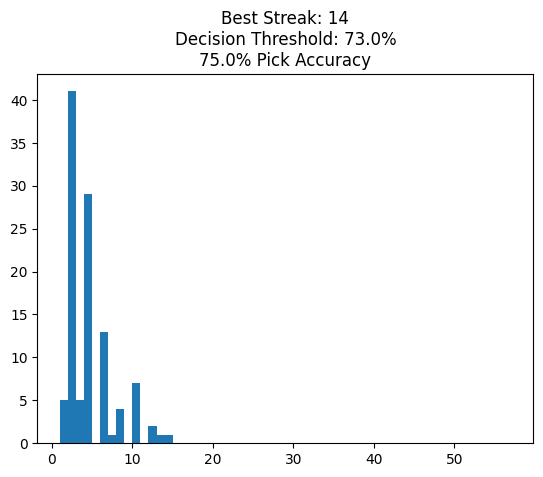

(StandardScaler(), PCA(n_components=0.99, random_state=57, svd_solver='full'), LogisticRegressionCV(cv=10, random_state=57))


In [29]:
log_reg.build_model()

In [30]:
todays_predictions = log_reg.todays_predictions()
todays_predictions

GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.21s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.13s
GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.13s


name  \
game_date           game_pk home  team opponent batter opp_starting_pitcher                       
2023-08-21 21:04:00 716904  False KC   OAK      677951 621112                    Bobby Witt Jr.   
2023-08-21 19:02:00 716910  True  ATL  NYM      660670 656849                  Ronald Acuña Jr.   
2023-08-21 18:04:00 716911  True  PHI  SF       681082 518397                      Bryson Stott   
2023-08-21 21:04:00 716907  True  SD   MIA      673490 677960                      Ha-Seong Kim   
                                                665487 677960                Fernando Tatis Jr.   
...                                                                                         ...   
2023-08-21 20:01:00 716908  True  HOU  BOS      572138 572020                     Jon Singleton   
                    716905  False SEA  CWS      645801 657053                         Mike Ford   
                            True  CWS  SEA      572204 622491                   Trayce Thompson   
2023-08-21 21:04:00 716907  False MIA  SD       607732 608379                   Jacob Stallings   
2023-08-21 20:01:00 716908  True  HOU  BOS      455117 572020                  Martín Maldonado   

                                                                             lineup  \
game_date           game_pk home  team opponent batter opp_starting_pitcher           
2023-08-21 21:04:00 716904  False KC   OAK      677951 621112                     0   
2023-08-21 19:02:00 716910  True  ATL  NYM      660670 656849                     1   
2023-08-21 18:04:00 716911  True  PHI  SF       681082 518397                     7   
2023-08-21 21:04:00 716907  True  SD   MIA      673490 677960                     0   
                                                665487 677960                     0   
...                                                                             ...   
2023-08-21 20:01:00 716908  True  HOU  BOS      572138 572020                    10   
                    716905  False SEA  CWS      645801 657053                     0   
                            True  CWS  SEA      572204 622491                    10   
2023-08-21 21:04:00 716907  False MIA  SD       607732 608379                     0   
2023-08-21 20:01:00 716908  True  HOU  BOS      455117 572020                     9   

                                                                            bats  \
game_date           game_pk home  team opponent batter opp_starting_pitcher        
2023-08-21 21:04:00 716904  False KC   OAK      677951 621112                  R   
2023-08-21 19:02:00 716910  True  ATL  NYM      660670 656849                  R   
2023-08-21 18:04:00 716911  True  PHI  SF       681082 518397                  L   
2023-08-21 21:04:00 716907  True  SD   MIA      673490 677960                  R   
                                                665487 677960                  R   
...                                                                          ...   
2023-08-21 20:01:00 716908  True  HOU  BOS      572138 572020                  L   
                    716905  False SEA  CWS      645801 657053                  L   
                            True  CWS  SEA      572204 622491                  R   
2023-08-21 21:04:00 716907  False MIA  SD       607732 608379                  R   
2023-08-21 20:01:00 716908  True  HOU  BOS      455117 572020                  R   

                                                                                H  \
game_date           game_pk home  team opponent batter opp_starting_pitcher         
2023-08-21 21:04:00 716904  False KC   OAK      677951 621112                True   
2023-08-21 19:02:00 716910  True  ATL  NYM      660670 656849                True   
2023-08-21 18:04:00 716911  True  PHI  SF       681082 518397                True   
2023-08-21 21:04:00 716907  True  SD   MIA      673490 677960                True   
                                                665487 677960       